In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

<BarContainer object of 29 artists>

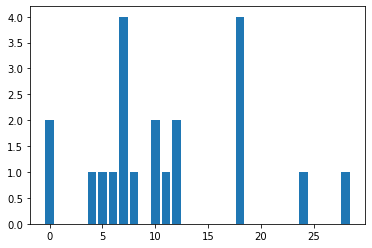

In [2]:
R_0 = 1.3
k = 0.38
p_serial = [0.05, 0.1, 0.3, 0.25, 0.1, 0.05, 0.05, 0.05, 0.03, 0.02]

n = k
p = k / (R_0 + k)

initial_cases = pd.read_csv('Lecture2Data.csv')

N = 10000
T = len(initial_cases) + len(p_serial)
plt.bar(np.arange(len(initial_cases['Cases'])), initial_cases['Cases'])

In [3]:
cases = np.zeros((N, T))

for i in range(N):
    for t in range(len(initial_cases)):
        cases[i, t] += initial_cases['Cases'][t]
        for j in range(initial_cases['Cases'][t]):
            child_cases = np.random.negative_binomial(n, p)
            if child_cases > 0:
                idx = np.random.choice(len(p_serial), p=p_serial, size=child_cases) + 1
                cases[i, t + idx] += 1

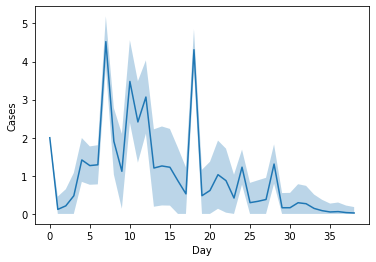

In [4]:
mean = np.mean(cases, axis=0)
std = np.std(cases, axis=0)

fig, ax = plt.subplots()
ax.plot(np.arange(T), mean)
ax.set_xlabel('Day')
ax.set_ylabel('Cases')
ax.fill_between(np.arange(T), np.clip(mean-std, 0, np.inf), mean+std ,alpha=0.3)

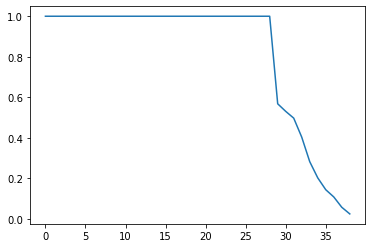

In [5]:
cases_prob = np.mean(np.hstack([np.any(cases[:, t:] > 0, axis=1, keepdims=True) for t in range(T)]), axis=0)
plt.plot(np.arange(T), cases_prob)